<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/High%20Five/ProjectHPDP_GroupHighFive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Access the dataset saved in google drive**

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1MerhI69Lsmynn-HYUthGIoqKzx5wDXNN/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('airline1516.csv')

### **Download and install each library**

In [ ]:
!pip install koalas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 8.3 MB/s eta 0:00:00


In [ ]:
!pip install modin[all] 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.3/970.3 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.1/439.1 KB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

### **Import all used libraries**

In [ ]:
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
import numpy as np
import modin.pandas as pd

**Koalas**

In [ ]:
import databricks.koalas as ks
import pyspark.pandas as ps

# **Import Dataset**

## **Reading file**

**Koalas**

In [ ]:
%%time
kdf = ks.read_csv('airline1516.csv')
kdf.head(10)

CPU times: user 555 ms, sys: 90.5 ms, total: 645 ms
Wall time: 1min 25s


,_c0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,2238.0,7.0,2250,2245.0,-5.0,0.0,None,0.0,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,None
1,1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,1354.0,9.0,1404,1403.0,-1.0,0.0,None,0.0,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,None
2,2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,None,0.0,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,None
3,3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,2343.0,4.0,2356,2347.0,-9.0,0.0,None,0.0,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,None
4,4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,830.0,10.0,855,840.0,-15.0,0.0,None,0.0,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,None
5,5,2015-01-01,NK,201,FLL,STT,1253,1258.0,5.0,24.0,1322.0,1634.0,10.0,1630,1644.0,14.0,0.0,None,0.0,157.0,166.0,132.0,1107.0,NaN,NaN,NaN,NaN,NaN,None
6,6,2015-01-01,NK,202,DFW,BWI,1342,1337.0,-5.0,11.0,1348.0,1700.0,5.0,1724,1705.0,-19.0,0.0,None,0.0,162.0,148.0,132.0,1217.0,NaN,NaN,NaN,NaN,NaN,None
7,7,2015-01-01,NK,203,BOS,PBI,1555,1554.0,-1.0,17.0,1611.0,1903.0,5.0,1913,1908.0,-5.0,0.0,None,0.0,198.0,194.0,172.0,1197.0,NaN,NaN,NaN,NaN,NaN,None
8,8,2015-01-01,NK,204,PBI,BOS,1205,1204.0,-1.0,11.0,1215.0,1455.0,9.0,1505,1504.0,-1.0,0.0,None,0.0,180.0,180.0,160.0,1197.0,NaN,NaN,NaN,NaN,NaN,None
9,9,2015-01-01,NK,209,ORD,OAK,1534,1534.0,0.0,11.0,1545.0,1736.0,6.0,1819,1742.0,-37.0,0.0,None,0.0,285.0,248.0,231.0,1836.0,NaN,NaN,NaN,NaN,NaN,None


In [ ]:
%%time
kdf.head()

In [ ]:
%%time
kdf.isnull()

**Pandas**

In [ ]:
%%time
df =pd.read_csv('airline1516.csv')
df

/usr/local/lib/python3.8/dist-packages/IPython/core/magics/execution.py:1310: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


CPU times: user 37.6 s, sys: 19.4 s, total: 57 s
Wall time: 57.2 s


,Unnamed: 0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,...,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,...,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,...,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,...,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,...,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436732,5617653,2016-12-31,NK,112,IAH,BWI,615,613.0,-2.0,12.0,...,170.0,167.0,144.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN
11436733,5617654,2016-12-31,NK,113,BWI,IAH,2108,2229.0,81.0,9.0,...,214.0,200.0,182.0,1235.0,0.0,0.0,0.0,0.0,67.0,NaN
11436734,5617655,2016-12-31,NK,121,ORD,RSW,700,704.0,4.0,11.0,...,172.0,151.0,136.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
11436735,5617656,2016-12-31,NK,124,RSW,ORD,1704,1711.0,7.0,9.0,...,183.0,170.0,154.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN


**Modin**

In [ ]:
%%time
modin_df = ks.read_csv('airline1516.csv')

CPU times: user 394 ms, sys: 50.5 ms, total: 444 ms
Wall time: 1min 1s


In [ ]:
%%time
# Select top N number of records (default = 5)
modin_df.head()

CPU times: user 13.6 ms, sys: 5.5 ms, total: 19.1 ms
Wall time: 117 ms


,_c0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,2238.0,7.0,2250,2245.0,-5.0,0.0,None,0.0,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,None
1,1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,1354.0,9.0,1404,1403.0,-1.0,0.0,None,0.0,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,None
2,2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,None,0.0,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,None
3,3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,2343.0,4.0,2356,2347.0,-9.0,0.0,None,0.0,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,None
4,4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,830.0,10.0,855,840.0,-15.0,0.0,None,0.0,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,None


# **Data Cleaning and Preparation**

## **Dropping Columns** 

**Pandas**

In [ ]:
%%time
df = df.drop(["CANCELLATION_CODE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "Unnamed: 27"], axis=1)

CPU times: user 785 ms, sys: 6.17 ms, total: 791 ms
Wall time: 811 ms


In [ ]:
row, col = df.shape
print('number of rows:',row)

print('number of column:',col)

number of rows: 11436737
number of column: 22


### **Checking and Dropping Null Value**


**Pandas**

In [ ]:
df.isna().sum()

Unnamed: 0                    0
FL_DATE                       0
OP_CARRIER                    0
OP_CARRIER_FL_NUM             0
ORIGIN                        0
DEST                          0
CRS_DEP_TIME                  0
DEP_TIME                 149609
DEP_DELAY                149609
TAXI_OUT                 154465
WHEELS_OFF               154465
WHEELS_ON                160357
TAXI_IN                  160357
CRS_ARR_TIME                  0
ARR_TIME                 160357
ARR_DELAY                184584
CANCELLED                     0
CANCELLATION_CODE      11280992
DIVERTED                      0
CRS_ELAPSED_TIME             12
ACTUAL_ELAPSED_TIME      184584
AIR_TIME                 184584
DISTANCE                      0
CARRIER_DELAY           9409059
WEATHER_DELAY           9409059
NAS_DELAY               9409059
SECURITY_DELAY          9409059
LATE_AIRCRAFT_DELAY     9409059
Unnamed: 27            11436737
dtype: int64

In [ ]:
%%time
df.dropna(inplace = True)
df.isna().sum()

CPU times: user 6.98 s, sys: 362 ms, total: 7.34 s
Wall time: 7.35 s


Unnamed: 0             0
FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

**Modin**

In [ ]:
%%time
modin_df.isnull()

CPU times: user 171 ms, sys: 30.9 ms, total: 202 ms
Wall time: 646 ms


,_c0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


## **Manipulating columns value**

**Pandas**

In [ ]:
df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)
df

,Unnamed: 0,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,0,2015-01-01,Spirit Airlines,195,MCO,FLL,2147,2143.0,-4.0,15.0,...,7.0,2250,2245.0,-5.0,0.0,0.0,63.0,62.0,40.0,177.0
1,1,2015-01-01,Spirit Airlines,197,LGA,FLL,1050,1104.0,14.0,20.0,...,9.0,1404,1403.0,-1.0,0.0,0.0,194.0,179.0,150.0,1076.0
2,2,2015-01-01,Spirit Airlines,198,FLL,MCO,700,712.0,12.0,19.0,...,10.0,757,813.0,16.0,0.0,0.0,57.0,61.0,32.0,177.0
3,3,2015-01-01,Spirit Airlines,199,IAH,LAS,2240,2251.0,11.0,8.0,...,4.0,2356,2347.0,-9.0,0.0,0.0,196.0,176.0,164.0,1222.0
4,4,2015-01-01,Spirit Airlines,200,IAH,ORD,623,620.0,-3.0,15.0,...,10.0,855,840.0,-15.0,0.0,0.0,152.0,140.0,115.0,925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436732,5617653,2016-12-31,Spirit Airlines,112,IAH,BWI,615,613.0,-2.0,12.0,...,11.0,1005,1000.0,-5.0,0.0,0.0,170.0,167.0,144.0,1235.0
11436733,5617654,2016-12-31,Spirit Airlines,113,BWI,IAH,2108,2229.0,81.0,9.0,...,9.0,2342,49.0,67.0,0.0,0.0,214.0,200.0,182.0,1235.0
11436734,5617655,2016-12-31,Spirit Airlines,121,ORD,RSW,700,704.0,4.0,11.0,...,4.0,1052,1035.0,-17.0,0.0,0.0,172.0,151.0,136.0,1120.0
11436735,5617656,2016-12-31,Spirit Airlines,124,RSW,ORD,1704,1711.0,7.0,9.0,...,7.0,1907,1901.0,-6.0,0.0,0.0,183.0,170.0,154.0,1120.0


In [ ]:
row, col = df.shape
print('number of rows:',row)

print('number of column:',col)

number of rows: 11252153
number of column: 22


In [ ]:
kdf['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)
kdf

### **groupby**

The code below utilizes the groupby operation.

In [ ]:
%%time
modin_df.groupby(['OP_CARRIER']).count()

CPU times: user 215 ms, sys: 30.2 ms, total: 245 ms
Wall time: 1.37 s


,_c0,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
OP_CARRIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,
UA,1060790,1060790,1060790,1060790,1060790,1060790,1049383,1049383,1048817,1048817,1048366,1048366,1060790,1048366,1045952,1060790,12043,1060790,1060790,1045952,1045952,1060790,197563,197563,197563,197563,197563,0
NK,255578,255578,255578,255578,255578,255578,251128,251128,250962,250962,250877,250877,255578,250877,250564,255578,4633,255578,255566,250564,250564,255578,66880,66880,66880,66880,66880,0
AA,1640479,1640479,1640479,1640479,1640479,1640479,1619838,1619838,1618811,1618811,1618287,1618287,1640479,1618287,1614347,1640479,21786,1640479,1640479,1614347,1614347,1640479,305732,305732,305732,305732,305732,0
EV,1062967,1062967,1062967,1062967,1062967,1062967,1036836,1036836,1036026,1036026,1035308,1035308,1062967,1035308,1032276,1062967,27120,1062967,1062967,1032276,1032276,1062967,194851,194851,194851,194851,194851,0
B6,549521,549521,549521,549521,549521,549521,541591,541591,541477,541477,541277,541277,549521,541277,540053,549521,8073,549521,549521,540053,540053,549521,125312,125312,125312,125312,125312,0
DL,1798627,1798627,1798627,1798627,1798627,1798627,1790907,1790907,1790731,1790731,1790516,1790516,1798627,1790516,1787171,1798627,7940,1798627,1798627,1787171,1787171,1798627,236961,236961,236961,236961,236961,0
OO,1194286,1194286,1194286,1194286,1194286,1194286,1177035,1177035,1176368,1176368,1174932,1174932,1194286,1174932,1172392,1194286,18406,1194286,1194286,1172392,1172392,1194286,204823,204823,204823,204823,204823,0
F9,185957,185957,185957,185957,185957,185957,184270,184270,184190,184190,184159,184159,185957,184159,183882,185957,1767,185957,185957,183882,183882,185957,45054,45054,45054,45054,45054,0
US,198715,198715,198715,198715,198715,198715,194825,194825,194674,194674,194586,194586,198715,194586,194223,198715,4067,198715,198715,194223,194223,198715,36549,36549,36549,36549,36549,0


# **Exploratory Analysis and Visualization**

#### **Graph 1: Graph of flight Delay Times Distribution**

**Pandas**

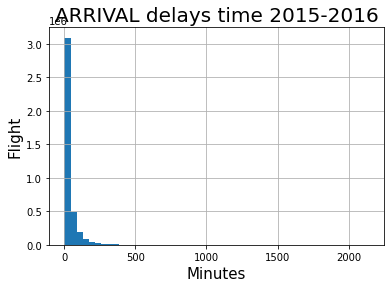

flight delay time median:  15.0


count    3.971681e+06
mean     3.391894e+01
std      5.609328e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.500000e+01
75%      3.800000e+01
max      2.142000e+03
Name: ARR_DELAY, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

df_delay = df[df.ARR_DELAY>0]



median_flight_delay_time = df_delay['ARR_DELAY'].median()
max = df_delay['ARR_DELAY'].max()
min = df_delay['ARR_DELAY'].min()

df_delay.hist(column='ARR_DELAY', bins=50)
plt.title('ARRIVAL delays time 2015-2016', fontsize=20)
plt.ylabel('Flight', fontsize=15)
plt.xlabel('Minutes', fontsize=15)
plt.show()

print("flight delay time median: ",median_flight_delay_time)
df_delay['ARR_DELAY'].describe()


### **Graph 2: Bar Graph of Flight Delays Count by each Airlines**

**Pandas**

OP_CARRIER
Virgin America         53931
Hawaiian Airlines      55909
US                     76285
Frontier Airlines      76749
Envoy Air             103505
Alaska Airlines       112015
Spirit Airlines       112939
JetBlue Airways       212338
United Airlines       346008
ExpressJet            369745
SkyWest Airlines      419596
Delta Airlines        488367
American Airlines     588136
Southwest Airlines    956158
Name: ARR_DELAY, dtype: int64

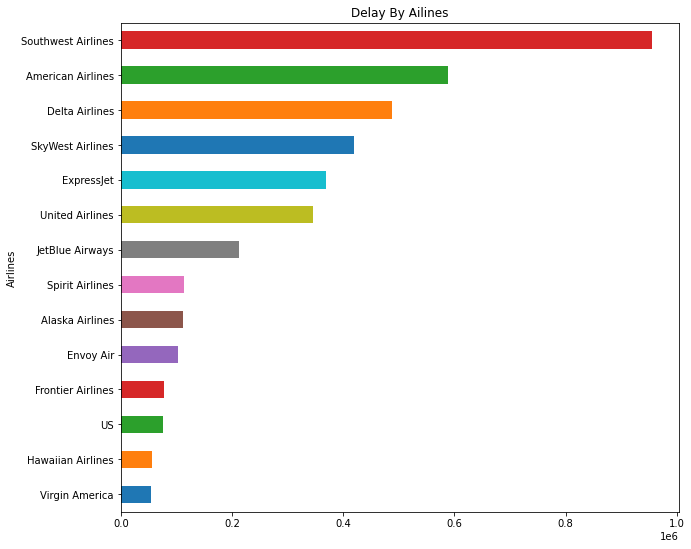

In [ ]:
df_delay_carrier = df_delay.groupby(['OP_CARRIER'])['ARR_DELAY'].count().sort_values(ascending=True)



df_delay_carrier.plot(kind='barh', title='Delay By Ailines', ylabel='Flight Delays',
         xlabel='Airlines', figsize=(10, 9), color=['C0', 'C1', 'C2', 'C3', 'C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14'])

df_delay_carrier

### **Graph 3: Line Graph of Total Delay Flight by each Date**

**Pandas**

In [ ]:
import plotly.express as px

df_time = df_delay


def get_day(timestamp):
    day = timestamp.split(' ')[0]
    return day

df_time['day'] = df_time['FL_DATE'].apply(get_day)
time_df = df_time.groupby(['day'])['ARR_DELAY'].count().reset_index()

fig = px.line(time_df, x='day', y='ARR_DELAY')

fig.show()

<ipython-input-16-b2a2e2769dc2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['day'] = df_time['FL_DATE'].apply(get_day)


### **Graph 4: Bar Graph of Average Flight Distance by Airlines**

**Pandas**

OP_CARRIER
Virgin America        1423.505525
United Airlines       1246.810537
Alaska Airlines       1212.924453
JetBlue Airways       1065.257669
American Airlines     1028.827510
Frontier Airlines     1005.696458
Spirit Airlines        982.529485
US                     915.380259
Delta Airlines         851.753105
Southwest Airlines     746.213229
Hawaiian Airlines      635.873791
SkyWest Airlines       498.301643
ExpressJet             451.950055
Envoy Air              422.661417
Name: DISTANCE, dtype: float64

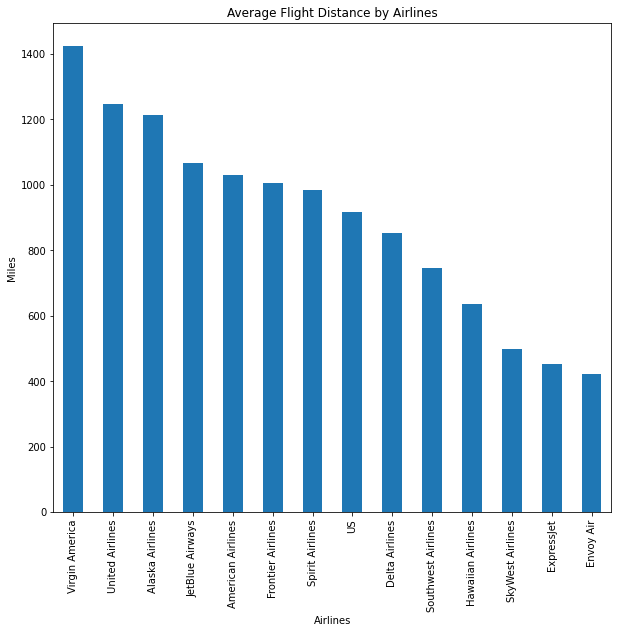

In [ ]:
df_distance = df.groupby(['OP_CARRIER'])['DISTANCE'].mean().sort_values(ascending=False)


df_distance.plot(kind='bar', title='Average Flight Distance by Airlines', ylabel='Miles',
         xlabel='Airlines', figsize=(10, 9))


df_distance

### **Graph 5: Pie Chart of Top 5 Airlines with most flight numbers**

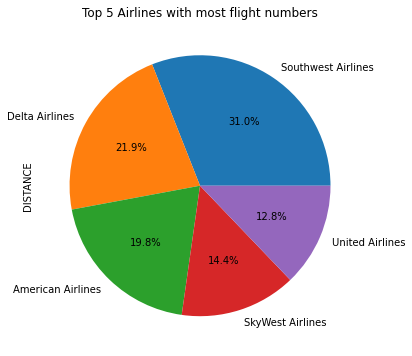

In [ ]:
import matplotlib.pyplot as plt


# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Top 5 Airlines with most flight numbers")



# Bar chart showing the total number of tweets grouping with candidate
df_source = df.groupby(['OP_CARRIER'])['DISTANCE'].count().sort_values(ascending=False).head(5)

#Table Settings
df_source.plot(kind='pie', autopct='%1.1f%%')

# **Asking and Answering Questions**

### **1. Top 5 Airlines that have the most flight numbers**

**Pandas**

In [ ]:
df_top5_flight_number = df.groupby(['OP_CARRIER'])['DISTANCE'].count().sort_values(ascending=False).head(5)
df_top5_flight_number 

OP_CARRIER
Southwest Airlines    2522917
Delta Airlines        1787171
American Airlines     1614347
SkyWest Airlines      1172392
United Airlines       1045952
Name: DISTANCE, dtype: int64

### **2. Top 10 days with the most number of delay flights.**

**Pandas**

In [ ]:
df_delay = df[df.ARR_DELAY>0]
df_time = df_delay


def get_day(timestamp):
    day = timestamp.split(' ')[0]
    return day

df_time['day'] = df_time['FL_DATE'].apply(get_day)
time_df = df_time.groupby(['day'])['ARR_DELAY'].count()

time_df.nlargest(10)

<ipython-input-21-fa4f2348c91c>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



day
2015-01-04    11107
2015-12-30    10047
2015-01-03    10002
2016-12-18     9854
2015-12-23     9519
2015-06-18     9300
2016-12-17     9165
2015-12-29     9148
2015-02-26     9121
2015-01-05     9080
Name: ARR_DELAY, dtype: int64

**Pandas**

### **3. What is the longest and shortest of flight delay time?**

**Pandas**

In [ ]:
df_delay = df[df.ARR_DELAY>0]

q3_max = df_delay['ARR_DELAY'].max()
q3_min = df_delay['ARR_DELAY'].min()

print("Longest flight delay time: ",q3_max, ' minutes')
print("Shortest flight delay time: ",q3_min, ' minutes')

Longest flight delay time:  2142.0  minutes
Shortest flight delay time:  1.0  minutes


### **4. What is the percentage of delay flight for each airlines?**

**Pandas**

In [ ]:
df_delay_percentage = ((df_delay.groupby(['OP_CARRIER'])['DISTANCE'].count()))/(df.groupby(['OP_CARRIER'])['DISTANCE'].count()) * 100

df_delay_percentage.rename('Delay Percentage', inplace = True)

df_delay_percentage.sort_values(ascending=False)

OP_CARRIER
Spirit Airlines       45.073913
Frontier Airlines     41.738180
Virgin America        41.643952
JetBlue Airways       39.317993
US                    39.277017
Southwest Airlines    37.898908
Envoy Air             37.126378
Hawaiian Airlines     36.630893
American Airlines     36.431820
ExpressJet            35.818425
SkyWest Airlines      35.789736
United Airlines       33.080677
Alaska Airlines       32.238986
Delta Airlines        27.326260
Name: Delay Percentage, dtype: float64

### **5. What is the average flight distance for each airlines?**

**Pandas**

In [ ]:
df_distance_q5 = df.groupby(['OP_CARRIER'])['DISTANCE'].mean().sort_values(ascending=False)
df_distance_q5

OP_CARRIER
Virgin America        1423.505525
United Airlines       1246.810537
Alaska Airlines       1212.924453
JetBlue Airways       1065.257669
American Airlines     1028.827510
Frontier Airlines     1005.696458
Spirit Airlines        982.529485
US                     915.380259
Delta Airlines         851.753105
Southwest Airlines     746.213229
Hawaiian Airlines      635.873791
SkyWest Airlines       498.301643
ExpressJet             451.950055
Envoy Air              422.661417
Name: DISTANCE, dtype: float64